# Exercícios revisão

## Requisitos

Para estes exercícios são necessários os seguintes ficheiros:

- Estrutura **2P18** do Protein Data Bank, no formato _pdb_ `num ficheiro com o nome `2p18.pdb`.
- Proteoma do organismo _H. influenzae_ no formato FASTA num ficheiro com o nome `uniprot_proteome_h_influenzae.fasta`.
- Proteoma do organismo _H. influenzae_ no formato _UniProt text_ num ficheiro com o nome `uniprot_proteome_h_influenzae.txt`.

Links:

[Proteoma UP000000579 (H. influenzae)](https://www.uniprot.org/proteomes/UP000000579)

[Estrutura 2P18](https://www.rcsb.org/structure/2p18)

#### 1.

Complete as seguintes funções.

- Todas elas devem ter um único argumento `seq` que representa uma sequência de um péptido (códigos de uma letra dos aminoácidos) e devem devolver o resultado pedido em cada pergunta.
- Todas as funções, para além do cabeçalho, **devem ter apenas uma linha de código: o comando `return` seguido de uma expressão que calcula o resultado**

In [1]:
# cadeia polipeptídica para teste
gre3 = 'MSSLVTLNNGLKMPLVGLGCWKIDKKVCANQIYEAIKLGYRLFDGACDYGNEKEVGEGIR'

1.1 A função deve devolver o número de aminoácidos da sequência

In [2]:
def n_aminoacidos(seq):
    return len(seq)
n_aminoacidos(gre3)

60

1.2 A função deve devolver o número de metioninas na sequência

In [3]:
def nM(seq):
    return seq.count('M')
nM(gre3)

2

1.3 A função deve devolver o número de aminoácidos ácidos (D e E) na sequência.

In [4]:
def n_aa_acidos(seq):
    return seq.count('E') + seq.count('D')
n_aa_acidos(gre3)

7

1.4 A função deve devolver um **dicionário** que associa as posições das lisinas (K) e argininas (R) com os respetivos códigos de 1 letra

In [5]:
def posKR(seq):
    return {i:a for i, a in enumerate(seq) if a in 'KR'}
posKR(gre3)

{11: 'K', 21: 'K', 24: 'K', 25: 'K', 36: 'K', 40: 'R', 52: 'K', 59: 'R'}

1.5 A função deve devolver o comprimento da sequência codificante CDS correspondente à sequência polipeptídica

In [6]:
def n_CDS(seq):
    return 3 * len(seq) + 3
n_CDS(gre3)

183

1.6 A função deve devolver uma string com a sequência apresentada em sentido contrário

In [7]:
def reverse_seq(seq):
    return ''.join(reversed(seq))
reverse_seq(gre3)

'RIGEGVEKENGYDCAGDFLRYGLKIAEYIQNACVKKDIKWCGLGVLPMKLGNNLTVLSSM'

1.7 A função deve devolver uma _string_ com os 10 aminoácidos finais, separados por "-CONH-" e acabando em "-COOH"

In [8]:
def tail10(seq):
    return '-CONH-'.join(seq[-10:]) + '-COOH'

tail10(gre3)

'N-CONH-E-CONH-K-CONH-E-CONH-V-CONH-G-CONH-E-CONH-G-CONH-I-CONH-R-COOH'

1.8 A função deve devolver uma lista contendo os códigos dos aminoácidos que estão a seguir ao aminoácido Glicina (G)

In [9]:
def next2G(seq):
    return [seq[i+1] for i in range(len(seq)-1) if seq[i] == 'G']
next2G(gre3)

['L', 'L', 'C', 'Y', 'A', 'N', 'E', 'I']

1.9 O enzima impossiblase é um protease que atua hidrolisando uma proteína nos locais `GL`, retirando estes dois amino-ácidos dos péptidos resultantes da hidrólise. A função deve devolver uma lista com as sequências dos péptidos resultantes da ação deste enzima.

In [10]:
def peps_impossiblase(seq):
    return seq.split('GL')
peps_impossiblase(gre3)

['MSSLVTLNN', 'KMPLV', 'GCWKIDKKVCANQIYEAIKLGYRLFDGACDYGNEKEVGEGIR']

1.10 A função deve devolver a maior distância entre duas glicinas (G) consecutivas. Sugestão: existe a função `max()` que calcula o maior número de uma **lista de números**. (sim, tudo numa única linha!)

In [11]:
def longest_GG(seq):
    return max([len(p) + 1 for p in seq.split('G')[1:-1]])
longest_GG(gre3)

20

1.11 A função deve devolver a sequência com a Metionina de iniciação removida

In [12]:
def removed_Minit(seq):
    return seq[1:]
removed_Minit(gre3)

'SSLVTLNNGLKMPLVGLGCWKIDKKVCANQIYEAIKLGYRLFDGACDYGNEKEVGEGIR'

1.12 A função deve devolver a sequência do péptido mas apenas até à primeira cisteína (C), exclusivé. Se não houver cisteínas, a função devolve a sequência completa.

In [13]:
def stop_C(seq):
    return seq.split('C')[0]
stop_C(gre3)

'MSSLVTLNNGLKMPLVGLG'

#### 2.

Suponha que está disponível num programa o dicionário com o código genético:
```
gencode = {
     'UUU': 'F', 'UUC': 'F', 'UUA': 'L', 'UUG': 'L', 'UCU': 'S',
     'UCC': 'S', 'UCA': 'S', 'UCG': 'S', 'UAU': 'Y', 'UAC': 'Y',
...
...
     'GAA': 'E', 'GAG': 'E', 'GGU': 'G', 'GGC': 'G', 'GGA': 'G',
     'GGG': 'G', 'UAA': 'STOP', 'UAG': 'STOP', 'UGA': 'STOP'}
```

Escreva a função  com o cabeçalho 
  
`def degen(gencode):`

que recebe como argumento o dicionário gencode e devolve um dicionário com 
**o nível de degeneração** de cada aminoácido. O nível de degeneração de um aminoácido 
é o numero de tripletos que codificam para esse aminoácido.

Por exemplo, se aplicarmos a função com  `print( degen(gencode) )` obtemos

```
{'F': 2, 'L': 6, 'S': 6, 'Y': 2, 'C': 2, 'W': 1, 'P': 4, 'H': 2, 'Q': 2, 'R': 6, 'I': 3,
'M': 1, 'T': 4, 'N': 2, 'K': 2, 'V': 4, 'A': 4, 'D': 2, 'E': 2, 'G': 4, 'STOP': 3}

```


In [14]:
gencode = {
     'UUU': 'F', 'UUC': 'F', 'UUA': 'L', 'UUG': 'L', 'UCU': 'S',
     'UCC': 'S', 'UCA': 'S', 'UCG': 'S', 'UAU': 'Y', 'UAC': 'Y',
     'UGU': 'C', 'UGC': 'C', 'UGG': 'W', 'CUU': 'L', 'CUC': 'L',
     'CUA': 'L', 'CUG': 'L', 'CCU': 'P', 'CCC': 'P', 'CCA': 'P',
     'CCG': 'P', 'CAU': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q',
     'CGU': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R', 'AUU': 'I',
     'AUC': 'I', 'AUA': 'I', 'AUG': 'M', 'ACU': 'T', 'ACC': 'T',
     'ACA': 'T', 'ACG': 'T', 'AAU': 'N', 'AAC': 'N', 'AAA': 'K',
     'AAG': 'K', 'AGU': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R',
     'GUU': 'V', 'GUC': 'V', 'GUA': 'V', 'GUG': 'V', 'GCU': 'A',
     'GCC': 'A', 'GCA': 'A', 'GCG': 'A', 'GAU': 'D', 'GAC': 'D',
     'GAA': 'E', 'GAG': 'E', 'GGU': 'G', 'GGC': 'G', 'GGA': 'G',
     'GGG': 'G', 'UAA': 'STOP', 'UAG': 'STOP', 'UGA': 'STOP'}

def degen(gencode):
    d = {}
    for aa in gencode.values():
        if aa in d:
            d[aa] = d[aa] + 1
        else:
            d[aa] = 1
    return d

print(degen(gencode))

{'F': 2, 'L': 6, 'S': 6, 'Y': 2, 'C': 2, 'W': 1, 'P': 4, 'H': 2, 'Q': 2, 'R': 6, 'I': 3, 'M': 1, 'T': 4, 'N': 2, 'K': 2, 'V': 4, 'A': 4, 'D': 2, 'E': 2, 'G': 4, 'STOP': 3}


In [15]:
# uma outra solução, consultar os docs da função setdefault(key, default)

gencode = {
     'UUU': 'F', 'UUC': 'F', 'UUA': 'L', 'UUG': 'L', 'UCU': 'S',
     'UCC': 'S', 'UCA': 'S', 'UCG': 'S', 'UAU': 'Y', 'UAC': 'Y',
     'UGU': 'C', 'UGC': 'C', 'UGG': 'W', 'CUU': 'L', 'CUC': 'L',
     'CUA': 'L', 'CUG': 'L', 'CCU': 'P', 'CCC': 'P', 'CCA': 'P',
     'CCG': 'P', 'CAU': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q',
     'CGU': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R', 'AUU': 'I',
     'AUC': 'I', 'AUA': 'I', 'AUG': 'M', 'ACU': 'T', 'ACC': 'T',
     'ACA': 'T', 'ACG': 'T', 'AAU': 'N', 'AAC': 'N', 'AAA': 'K',
     'AAG': 'K', 'AGU': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R',
     'GUU': 'V', 'GUC': 'V', 'GUA': 'V', 'GUG': 'V', 'GCU': 'A',
     'GCC': 'A', 'GCA': 'A', 'GCG': 'A', 'GAU': 'D', 'GAC': 'D',
     'GAA': 'E', 'GAG': 'E', 'GGU': 'G', 'GGC': 'G', 'GGA': 'G',
     'GGG': 'G', 'UAA': 'STOP', 'UAG': 'STOP', 'UGA': 'STOP'}

def degen(gencode):
    d = {}
    for aa in gencode.values():
        d[aa] = d.setdefault(aa, 0) + 1
    return d

print(degen(gencode))

{'F': 2, 'L': 6, 'S': 6, 'Y': 2, 'C': 2, 'W': 1, 'P': 4, 'H': 2, 'Q': 2, 'R': 6, 'I': 3, 'M': 1, 'T': 4, 'N': 2, 'K': 2, 'V': 4, 'A': 4, 'D': 2, 'E': 2, 'G': 4, 'STOP': 3}


In [16]:
# outra solução, se tivermos os códigos dos 20 amino-ácidos numa string
gencode = {
     'UUU': 'F', 'UUC': 'F', 'UUA': 'L', 'UUG': 'L', 'UCU': 'S',
     'UCC': 'S', 'UCA': 'S', 'UCG': 'S', 'UAU': 'Y', 'UAC': 'Y',
     'UGU': 'C', 'UGC': 'C', 'UGG': 'W', 'CUU': 'L', 'CUC': 'L',
     'CUA': 'L', 'CUG': 'L', 'CCU': 'P', 'CCC': 'P', 'CCA': 'P',
     'CCG': 'P', 'CAU': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q',
     'CGU': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R', 'AUU': 'I',
     'AUC': 'I', 'AUA': 'I', 'AUG': 'M', 'ACU': 'T', 'ACC': 'T',
     'ACA': 'T', 'ACG': 'T', 'AAU': 'N', 'AAC': 'N', 'AAA': 'K',
     'AAG': 'K', 'AGU': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R',
     'GUU': 'V', 'GUC': 'V', 'GUA': 'V', 'GUG': 'V', 'GCU': 'A',
     'GCC': 'A', 'GCA': 'A', 'GCG': 'A', 'GAU': 'D', 'GAC': 'D',
     'GAA': 'E', 'GAG': 'E', 'GGU': 'G', 'GGC': 'G', 'GGA': 'G',
     'GGG': 'G', 'UAA': 'STOP', 'UAG': 'STOP', 'UGA': 'STOP'}

def degen(gencode):
    
    values = list(gencode.values())
    return {a: values.count(a) for a in list("ACDEFGHIKLMNPQRSTVWY") + ['STOP']}

print(degen(gencode))

{'A': 4, 'C': 2, 'D': 2, 'E': 2, 'F': 2, 'G': 4, 'H': 2, 'I': 3, 'K': 2, 'L': 6, 'M': 1, 'N': 2, 'P': 4, 'Q': 2, 'R': 6, 'S': 6, 'T': 4, 'V': 4, 'W': 1, 'Y': 2, 'STOP': 3}


In [17]:
# o mesmo, se tivermos os códigos dos 20 amino-ácidos numa string, mas fazendo as contagens uma a uma
gencode = {
     'UUU': 'F', 'UUC': 'F', 'UUA': 'L', 'UUG': 'L', 'UCU': 'S',
     'UCC': 'S', 'UCA': 'S', 'UCG': 'S', 'UAU': 'Y', 'UAC': 'Y',
     'UGU': 'C', 'UGC': 'C', 'UGG': 'W', 'CUU': 'L', 'CUC': 'L',
     'CUA': 'L', 'CUG': 'L', 'CCU': 'P', 'CCC': 'P', 'CCA': 'P',
     'CCG': 'P', 'CAU': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q',
     'CGU': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R', 'AUU': 'I',
     'AUC': 'I', 'AUA': 'I', 'AUG': 'M', 'ACU': 'T', 'ACC': 'T',
     'ACA': 'T', 'ACG': 'T', 'AAU': 'N', 'AAC': 'N', 'AAA': 'K',
     'AAG': 'K', 'AGU': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R',
     'GUU': 'V', 'GUC': 'V', 'GUA': 'V', 'GUG': 'V', 'GCU': 'A',
     'GCC': 'A', 'GCA': 'A', 'GCG': 'A', 'GAU': 'D', 'GAC': 'D',
     'GAA': 'E', 'GAG': 'E', 'GGU': 'G', 'GGC': 'G', 'GGA': 'G',
     'GGG': 'G', 'UAA': 'STOP', 'UAG': 'STOP', 'UGA': 'STOP'}

def degen(gencode):
    
    # iniciar tudo a zeros
    contagens = {a:0 for a in list("ACDEFGHIKLMNPQRSTVWY") + ['STOP']}
    for a in gencode.values():
        contagens[a] = contagens[a] + 1
        # ou, para os conhecedores, contagens[a] += 1
    return contagens

print(degen(gencode))

{'A': 4, 'C': 2, 'D': 2, 'E': 2, 'F': 2, 'G': 4, 'H': 2, 'I': 3, 'K': 2, 'L': 6, 'M': 1, 'N': 2, 'P': 4, 'Q': 2, 'R': 6, 'S': 6, 'T': 4, 'V': 4, 'W': 1, 'Y': 2, 'STOP': 3}


In [18]:
# Para os aficionados, nos muitos módulos da linguagem Python, na "Standard Lib" há um chamado "collections" que contem um "contador".

from collections import Counter

gencode = {
     'UUU': 'F', 'UUC': 'F', 'UUA': 'L', 'UUG': 'L', 'UCU': 'S',
     'UCC': 'S', 'UCA': 'S', 'UCG': 'S', 'UAU': 'Y', 'UAC': 'Y',
     'UGU': 'C', 'UGC': 'C', 'UGG': 'W', 'CUU': 'L', 'CUC': 'L',
     'CUA': 'L', 'CUG': 'L', 'CCU': 'P', 'CCC': 'P', 'CCA': 'P',
     'CCG': 'P', 'CAU': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q',
     'CGU': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R', 'AUU': 'I',
     'AUC': 'I', 'AUA': 'I', 'AUG': 'M', 'ACU': 'T', 'ACC': 'T',
     'ACA': 'T', 'ACG': 'T', 'AAU': 'N', 'AAC': 'N', 'AAA': 'K',
     'AAG': 'K', 'AGU': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R',
     'GUU': 'V', 'GUC': 'V', 'GUA': 'V', 'GUG': 'V', 'GCU': 'A',
     'GCC': 'A', 'GCA': 'A', 'GCG': 'A', 'GAU': 'D', 'GAC': 'D',
     'GAA': 'E', 'GAG': 'E', 'GGU': 'G', 'GGC': 'G', 'GGA': 'G',
     'GGG': 'G', 'UAA': 'STOP', 'UAG': 'STOP', 'UGA': 'STOP'}

def degen(gencode):
    return Counter(gencode.values()) # sim, só isto!

print(degen(gencode))

Counter({'L': 6, 'S': 6, 'R': 6, 'P': 4, 'T': 4, 'V': 4, 'A': 4, 'G': 4, 'I': 3, 'STOP': 3, 'F': 2, 'Y': 2, 'C': 2, 'H': 2, 'Q': 2, 'N': 2, 'K': 2, 'D': 2, 'E': 2, 'W': 1, 'M': 1})


Técnicamente, este Counter não é um dicionário, mas comporta-se como um dicionário.

Ver [docs acerca do Counter](https://docs.python.org/3.7/library/collections.html#counter-objects)

#### 3.

Suponha que a função `degen()` da pergunta 2 está disponível. 

Escreva uma função com o cabeçalho 

`def degenseq(seq):` 

que recebe uma string `seq` com a uma sequência polipeptídica (códigos de 1 letra) 
e devolve uma **lista de inteiros** com os níveis de degeneração de 
cada aminoácido da sequência.

Por exemplo, se aplicarmos a função com 

`print( degenseq('AVGGGKGDEM') )`

obtemos

`[4, 4, 4, 4, 4, 2, 4, 2, 2, 1]`


In [19]:
def degenseq(seq):
    d = degen(gencode)
    perfil = []
    for aa in seq:
        perfil.append(d[aa])
    return perfil

print(degenseq('AVGGGKGDEM'))

[4, 4, 4, 4, 4, 2, 4, 2, 2, 1]


In [20]:
def degenseq(seq):
    d = degen(gencode)
    return [d[aa] for aa in seq] # versão com lista em compreensão

print(degenseq('AVGGGKGDEM'))

[4, 4, 4, 4, 4, 2, 4, 2, 2, 1]


#### 4.

Escreva uma função com o cabeçalho 

`def find_CDS(seq):` 

que recebe uma string `seq` com a uma sequência de nucleótidos.

A função deve devolver uma **string** com uma sequência codificante interior à sequência.

A sequência codificante deve:

- começar pelo codão ATG
- terminar num codão stop TAA, TAG ou TGA
- ter, pelo menos, 20 codões

Se não conseguir encontrar uma sequência codificante, a função deve devolver uma string vazia.

In [21]:
seqtest = 'TCCATTGTCATGGCTGTCTCTAAAAGTTTACGCTTGATCCGTCTACGACTCCCGTGGAAACCCAACCGTCGAAGTCGAATGGTGACAACGCTGTTTTCGCTGGTGAAAACTTCCACCACGGAATGACATTATAACGAAAAGGGTGTTTTC'

def find_CDS(seq):
    # separar em codões
    cods = [seq[i:i+3] for i in range(0, len(seq), 3)]
    # start e stop para as posições do início e fim da CDS
    # -1 significa que não foram encontrados
    start = -1
    end = -1
    
    # procurar o início
    for i, c in enumerate(cods):
        if c == 'ATG':
            start = i
            break
    # procurar o fim
    if start != -1:
        for i in range(start+1, len(cods)):
            if cods[i] in ['TAA', 'TAG', 'TGA']:
                end = i
                break
    # se não cumprir as condições, devolver ''
    if start == -1 or end == -1 or end - start < 19:
        return ''
    # se tudo OK, juntar os codões entre start e stop
    else:
        return ''.join(cods[start: end+1])
    
find_CDS(seqtest)

'ATGGCTGTCTCTAAAAGTTTACGCTTGATCCGTCTACGACTCCCGTGGAAACCCAACCGTCGAAGTCGAATGGTGACAACGCTGTTTTCGCTGGTGAAAACTTCCACCACGGAATGA'

Reparar que começa por um codão de iniciação e termina num codão STOP

#### 5.

De seguida apresentam-se algumas linhas **ATOM** do ficheiro PDB 2p18.pdb.

```
ATOM      1  N   MET A   1      15.111  21.307  72.426  1.00 25.29           N  
ATOM      2  CA  MET A   1      16.497  20.745  72.503  1.00 24.74           C  
ATOM      3  C   MET A   1      17.410  21.250  71.362  1.00 23.94           C  
ATOM      4  O   MET A   1      18.617  20.980  71.364  1.00 24.47           O  
ATOM      5  CB  MET A   1      16.440  19.210  72.519  1.00 25.25           C  
ATOM      6  N   ARG A   2      16.850  22.001  70.421  1.00 22.89           N  
ATOM      7  CA  ARG A   2      17.620  22.532  69.297  1.00 21.96           C  
ATOM      8  C   ARG A   2      18.297  23.858  69.651  1.00 21.68           C  
ATOM      9  O   ARG A   2      17.644  24.815  70.053  1.00 22.25           O  
ATOM     10  CB  ARG A   2      16.734  22.694  68.046  1.00 21.41           C  
```

Escreva uma função com o cabeçalho

`def nCalpha(filename):`

que, dado o nome de um ficheiro PDB, abra esse ficheiro, e, por processamento das linhas começadas por ATOM, devolva o **numero de átomos de carbono alfa** (CA) existentes na estrutura       


In [22]:
def nCalpha(filename):
    with open(filename) as datafile:
        lines = datafile.read().splitlines()
    count = 0
    for line in lines:
        if line.startswith("ATOM"):
            atomword, i, atomtype, *rest = line.split()
            if atomtype == "CA":
                count += 1
    return count

print(f'A estrutura 2p18 tem {nCalpha("2p18.pdb")} carbonos alfa')

A estrutura 2p18 tem 285 carbonos alfa


#### 6.

De seguida apresentam-se algumas linhas **ATOM** do ficheiro PDB 2p18.pdb.

```
ATOM      1  N   MET A   1      15.111  21.307  72.426  1.00 25.29           N  
ATOM      2  CA  MET A   1      16.497  20.745  72.503  1.00 24.74           C  
ATOM      3  C   MET A   1      17.410  21.250  71.362  1.00 23.94           C  
ATOM      4  O   MET A   1      18.617  20.980  71.364  1.00 24.47           O  
ATOM      5  CB  MET A   1      16.440  19.210  72.519  1.00 25.25           C  
ATOM      6  N   ARG A   2      16.850  22.001  70.421  1.00 22.89           N  
ATOM      7  CA  ARG A   2      17.620  22.532  69.297  1.00 21.96           C  
ATOM      8  C   ARG A   2      18.297  23.858  69.651  1.00 21.68           C  
ATOM      9  O   ARG A   2      17.644  24.815  70.053  1.00 22.25           O  
ATOM     10  CB  ARG A   2      16.734  22.694  68.046  1.00 21.41           C  
```

Escreva uma função com o cabeçalho

`def coords_CA(filename):`

que, dado o nome de um ficheiro PDB, abra esse ficheiro, e, por processamento das linhas começadas por ATOM, devolva **uma lista de listas** em que cada elemento são as 3 coordenadas de cada carbono alfa (CA)

```
[[16.497, 20.745, 72.503], [17.62, 22.532, 69.297], ...  ...]
```


In [23]:
def coords_CA(filename):
    with open(filename) as datafile:
        lines = datafile.read().splitlines()
    coords = []
    for line in lines:
        if line.startswith("ATOM"):
            atomword, i, atomtype, aa, chain, atomnum, x, y, z, *rest = line.split()
            if atomtype == "CA":
                coords.append([float(x), float(y), float(z)])
    return coords

coords = coords_CA('2p18.pdb')
print(coords[:10])

[[16.497, 20.745, 72.503], [17.62, 22.532, 69.297], [20.397, 25.091, 69.841], [21.39, 28.271, 68.023], [24.891, 28.722, 66.628], [26.809, 31.609, 65.02], [29.257, 31.504, 62.094], [31.395, 34.661, 61.825], [33.125, 36.045, 58.724], [36.27, 37.946, 59.784]]


#### 7.

Suponha que a função `coords_CA()` da pergunta 6 está disponível. 

Aplique essa função ao ficheiro `2p18.pdb` para obter uma lista de coordenadas.

**Calcule a distância entre os dois carbonos alfa mais distantes entre si**.

In [24]:
coords = coords_CA('2p18.pdb')

all_distances = []
for i1 in range(len(coords)-1):
    for i2 in range(i1 + 1, len(coords)):
        x1, y1, z1 = coords[i1]
        x2, y2, z2 = coords[i2]
        d = ((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)**0.5
        all_distances.append(d)
maxdCA = max(all_distances)

print(f'A maior distância entre 2 átomos de carbono alfa é {maxdCA} angstrons')

A maior distância entre 2 átomos de carbono alfa é 59.41039579905186 angstrons


#### Uma pequena explicação:

Imaginando que existem apena 4 carbonos alfa, numerados 0, 1, 2, 3

então as distâncias a calcular seriam estas:

```
0-1 0-2 0-3
1-2 1-3
2-3
```

Para gerar automaticamente **os índices** destas distâncias usamos dois `for`:

```
for i1 in range(len(coords)-1):
    for i2 in range(i1 + 1, len(coords)):
```

`i1` é o índice do primeiro carbono no cálculo de uma distância

`i2` é o índice do segundo carbono no cálculo de uma distância

**No exemplo acima, `i1` toma os valores 0, 1, 2 enquanto que `i2` toma os valores de `i1`+1 até 3**

Generalizando:

```
for i1 in range(len(coords)-1):
    for i2 in range(i1 + 1, len(coords)):
```

#### 8.

Dado o ficheiro `uniprot_proteome_h_influenzae.fasta` com as sequências do proteoma do organismo _H. influenzae_ em formato FASTA,

Escreva uma função com o cabeçalho

`def extract_from_FASTA(filename):`

que, dado o nome de um ficheiro FASTA, abra esse ficheiro, e devolva **uma lista de dicionários**, um para cada proteína, com as seguintes chaves e valores:

- 'AC': o Uniprot Access Id,
- 'seq': a sequência da proteína
- 'desc': a descrição da proteína
- 'PE': o campo "protein existence code" (tem de ser um número inteiro)
- 'species': a espécie

Observe o formato de um header FASTA da Uniprot:


`>sp|P44344|RL3_HAEIN 50S ribosomal protein L3 OS=Haemophilus influenzae (strain ATCC 51907 / DSM 11121 / KW20 / Rd) OX=71421 GN=rplC PE=3 SV=1`



In [25]:
def extract_from_FASTA(filename):
    with open(filename) as datafile:
        records = datafile.read().split('>')
    records.pop(0) # há um > no início do ficheiro
    
    prots = []
    for prot in records:
        # separação do header e da seq
        header, *seqlines = prot.splitlines()
        seq = ''.join(seqlines).replace(' ', '') # já temos a seq
        
        # extração da informação do header
        db, AC, rest = header.split('|') # já temos o AC
        desc, rest = rest.split('OS=', 1) # já temos a desc
        species, rest = rest.split('OX=', 1) # já temos a species
        
        leftPE, rightPE = rest.split('PE=', 1)
        PE = int(rightPE.split()[0]) # já temos o código PE, como inteiro
        
        # acrescentar novo dicionário à lista prots
        prots.append({'AC': AC,
                      'seq': seq,
                      'desc': desc.strip(),
                      'PE': PE,
                      'species': species.strip()})
    return prots
        

prots = extract_from_FASTA('uniprot_proteome_h_influenzae.fasta')
prots[:5]

[{'AC': 'P44345',
  'seq': 'MELQVVGANALTVSETTFGREFNEALIHQVVVAYAAGARQGTRAQKTRAEVSGSGKKPWRQKGTGRARAGDIKSPIWRSGGTTFAAKPQDHSQKVNKKMYRGAIKSILSELVRQDRLVVVEKFELDAPKTKVLVQKLKDLAVEDALIITASLDENLFLAARNLYKVDVRDVQGIDPVSLIAFDKVIVTVDAVKQIEEILA',
  'desc': 'RL4_HAEIN 50S ribosomal protein L4',
  'PE': 3,
  'species': 'Haemophilus influenzae (strain ATCC 51907 / DSM 11121 / KW20 / Rd)'},
 {'AC': 'P43738',
  'seq': 'MGYSYSEKKRIRKDFGKRPQVLNVPYLLTIQLDSFDKFIQKDPEGQQGLEAAFRSVFPIVSNNGYTELQYVDYRLEEPEFDVRECQIRGSTYAAGLRVKLRLVSYDKESSSRAVKDIKENEVYMGEIPLMTDNGTFVINGTERVIVSQLHRSPGVFFDSDKGKTHSSGKVLYNARIIPYRGSWLDFEFDPKDNLFARIDRRRKLPATIILRALGYTTEEILNLFFDKITFEIAGDKLLMTLVPERLRGETASFDIEANGKVYVERGRRITARHIKALEKDNISQVVVPSEYILGKVASKDYVDLESGEIICPANGEISLETLAKLAQAGYTTIETLFTNDLDYGPYISETLRVDPTYDKTSALYEIYRMMRPGEPPTPESSEALFNNLFFSAERYDLSTVGRMKFNRSLAFPEGEGAGILSNEDIIAVMRKLIDIRNGRGEVDDIDHLGNRRIRSVGEMAENQFRIGLVRVERAVKERLSLGDLDAITPQDLINPKPISAAVKEFFGSSQLSQFMDQNNPLSEVTHKRRISALGPGGLTRERAGFEVRDVHNTHYGRLCPIETPEGPNIGLINSLSAFARTNDYGFLETPYRKVVDGQ

#### 9.

Aplique a função criada no exercício anterior ao ficheiro `uniprot_proteome_h_influenzae.fasta` com as sequências do proteoma do organismo _H. influenzae_ em formato FASTA.

Transforme a lista de dicionários obtida num DataFrame do módulo pandas, usando o AC como índice. Mostre o DataFrame criado.

- 9.1 Qual a proteína com maior sequência deste organismo?
- 9.2 Qual a média e desvio padrão do comprimeto das proteínas
- 9.3 Faça um histograma dos comprimentos das proteínas
- 9.4 Faça um gráfico de barras com as contagens de cada nível PE



In [26]:
import pandas as pd
prots =  extract_from_FASTA('uniprot_proteome_h_influenzae.fasta')

hinfluenzae = pd.DataFrame(prots).set_index('AC')
hinfluenzae

,PE,desc,seq,species
AC,,,,
P44345,3,RL4_HAEIN 50S ribosomal protein L4,MELQVVGANALTVSETTFGREFNEALIHQVVVAYAAGARQGTRAQK...,Haemophilus influenzae (strain ATCC 51907 / DS...
P43738,3,RPOB_HAEIN DNA-directed RNA polymerase subunit...,MGYSYSEKKRIRKDFGKRPQVLNVPYLLTIQLDSFDKFIQKDPEGQ...,Haemophilus influenzae (strain ATCC 51907 / DS...
P31777,1,RLMJ_HAEIN Ribosomal RNA large subunit methylt...,MLSYHHSFHAGNHADVLKHIVLMLILENLKLKEKGFFYLDTHSGVG...,Haemophilus influenzae (strain ATCC 51907 / DS...
P44359,3,RL21_HAEIN 50S ribosomal protein L21,MYAVFQSGGKQHRVSEGQVVRLEKLELATGATVEFDSXLMVVNGED...,Haemophilus influenzae (strain ATCC 51907 / DS...
P44343,3,RL2_HAEIN 50S ribosomal protein L2,MAIVKCKPTSAGRRHVVKIVNPELHKGKPYAPLLDTKSKTGGRNNY...,Haemophilus influenzae (strain ATCC 51907 / DS...
P44756,3,RPE_HAEIN Ribulose-phosphate 3-epimerase,MKPYLIAPSILSADLARLGDDVQNVLNAGADVIHFDVMDNHYVPNL...,Haemophilus influenzae (strain ATCC 51907 / DS...
P44346,3,RL5_HAEIN 50S ribosomal protein L5,MAKLHDYYRDQVVSELKNKFGYKSVMQVPRIEKITLNMGVGEALTD...,Haemophilus influenzae (strain ATCC 51907 / DS...
P44347,3,RL6_HAEIN 50S ribosomal protein L6,MSRVAKAPVNIPAGVEVKLDGQLLTVKGKNGELSRKIHESVEVKQD...,Haemophilus influenzae (strain ATCC 51907 / DS...
P44083,3,RLMC_HAEIN 23S rRNA (uracil(747)-C(5))-methylt...,MIDCRYYQQNECRSCQWLEIPCSQQLTEKQYHLKQQLISINYDEAQ...,Haemophilus influenzae (strain ATCC 51907 / DS...


In [27]:
# precisamos de ter uma coluna com os comprimentos das proteínas
ncol = hinfluenzae['seq'].str.len()
hinfluenzae['n'] = ncol

hinfluenzae

,PE,desc,seq,species,n
AC,,,,,
P44345,3,RL4_HAEIN 50S ribosomal protein L4,MELQVVGANALTVSETTFGREFNEALIHQVVVAYAAGARQGTRAQK...,Haemophilus influenzae (strain ATCC 51907 / DS...,200
P43738,3,RPOB_HAEIN DNA-directed RNA polymerase subunit...,MGYSYSEKKRIRKDFGKRPQVLNVPYLLTIQLDSFDKFIQKDPEGQ...,Haemophilus influenzae (strain ATCC 51907 / DS...,1343
P31777,1,RLMJ_HAEIN Ribosomal RNA large subunit methylt...,MLSYHHSFHAGNHADVLKHIVLMLILENLKLKEKGFFYLDTHSGVG...,Haemophilus influenzae (strain ATCC 51907 / DS...,281
P44359,3,RL21_HAEIN 50S ribosomal protein L21,MYAVFQSGGKQHRVSEGQVVRLEKLELATGATVEFDSXLMVVNGED...,Haemophilus influenzae (strain ATCC 51907 / DS...,103
P44343,3,RL2_HAEIN 50S ribosomal protein L2,MAIVKCKPTSAGRRHVVKIVNPELHKGKPYAPLLDTKSKTGGRNNY...,Haemophilus influenzae (strain ATCC 51907 / DS...,273
P44756,3,RPE_HAEIN Ribulose-phosphate 3-epimerase,MKPYLIAPSILSADLARLGDDVQNVLNAGADVIHFDVMDNHYVPNL...,Haemophilus influenzae (strain ATCC 51907 / DS...,224
P44346,3,RL5_HAEIN 50S ribosomal protein L5,MAKLHDYYRDQVVSELKNKFGYKSVMQVPRIEKITLNMGVGEALTD...,Haemophilus influenzae (strain ATCC 51907 / DS...,179
P44347,3,RL6_HAEIN 50S ribosomal protein L6,MSRVAKAPVNIPAGVEVKLDGQLLTVKGKNGELSRKIHESVEVKQD...,Haemophilus influenzae (strain ATCC 51907 / DS...,177
P44083,3,RLMC_HAEIN 23S rRNA (uracil(747)-C(5))-methylt...,MIDCRYYQQNECRSCQWLEIPCSQQLTEKQYHLKQQLISINYDEAQ...,Haemophilus influenzae (strain ATCC 51907 / DS...,392


In [28]:
# 9.1
largest = hinfluenzae['n'].idxmax()

print(largest, 'tem', hinfluenzae.loc[largest]['n'], 'aminoácidos')
print(hinfluenzae.loc[largest]['desc'])

P44969 tem 1694 aminoácidos
IGA0_HAEIN Immunoglobulin A1 protease autotransporter


In [29]:
# 9.2
print('Média:', hinfluenzae['n'].mean())
print('Desvio padrão:', hinfluenzae['n'].std())

Média: 309.1277094317516
Desvio padrão: 204.80655980662925


In [30]:
# não esquecer este comando dos Jupyter notebooks
%matplotlib inline

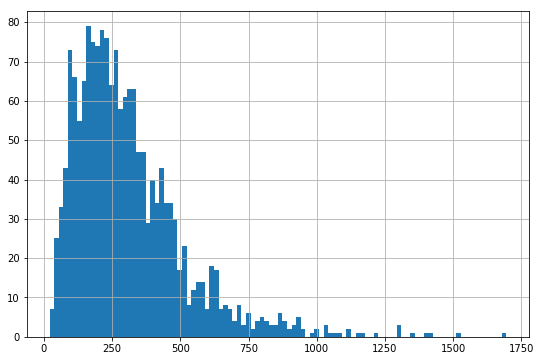

In [31]:
# 9.3
h = hinfluenzae['n'].hist(bins=100, figsize=(9,6))

In [32]:
# 9.4

countsPE = hinfluenzae['PE'].value_counts(sort=False)
countsPE

1     276
2       4
3    1154
4     257
5      16
Name: PE, dtype: int64

In [33]:
# 9.4

# De https://www.uniprot.org/help/protein_existence:

# 1. Experimental evidence at protein level
# 2. Experimental evidence at transcript level
# 3. Protein inferred from homology
# 4. Protein predicted
# 5. Protein uncertain

countsPE = hinfluenzae['PE'].value_counts(sort=False)

countsPE = countsPE.rename(index={1:'1- Experimental (protein)',
                                  2:'2- Experimental (transcript)',
                                  3:'3- Inferred from homology',
                                  4:'4- Protein predicted',
                                  5:'5 -Protein uncertain'})
countsPE

1- Experimental (protein)        276
2- Experimental (transcript)       4
3- Inferred from homology       1154
4- Protein predicted             257
5 -Protein uncertain              16
Name: PE, dtype: int64

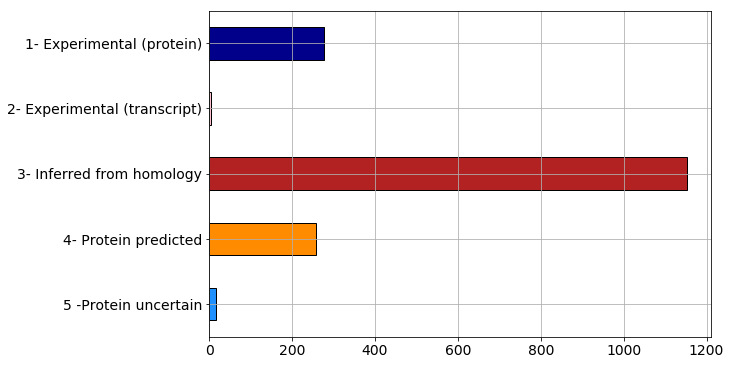

In [34]:
ax = countsPE.plot(kind='barh', figsize=(9,6), grid=True, fontsize=14,
                     color=['darkblue', 'pink', 'firebrick', 'darkorange', 'dodgerblue'],
                     edgecolor='black')
ax.invert_yaxis()

#### 10.

Dado o ficheiro `uniprot_proteome_h_influenzae.txt` com as sequências do proteoma do organismo _H. influenzae_ em formato UniProt Text, o mesmo formato do ficheiro usado nas TPs

Escreva uma função com o cabeçalho

`def extract_keywords_from_Uniprot_txt(filename):`

que, dado o nome de um ficheiro, abra esse ficheiro, e devolva **uma lista de dicionários**, um para cada proteína, com as seguintes chaves e valores:

- 'AC': o Uniprot Access Id,
- 'keywords': uma lista com as "keywords" atribuídas à proteína

Depois, aplicando a função ao ficheiro `uniprot_proteome_h_influenzae.txt`, responda à pergunta:

**Quais são as 50 keywords mais usadas** na descrição das proteínas do organismo _H. influenzae_?


In [35]:
def extract_keywords_from_Uniprot_txt(filename):
    with open(filename) as datafile:
        records = datafile.read().split('//\n')
    records.pop(-1) # porque há um // no final do ficheiro
    
    prots = []
    for prot in records:
        idline, acline, *otherlines = prot.splitlines()
        ac = acline.split(';')[0].split()[1]
        
        # as keywords estão em linhas começadas por KW
        # já agora tiramos o princípio de cada uma dessas linhas com slice
        
        linesKW = [line[5:] for line in otherlines if line.startswith('KW')]
        
        # colectar todas as keywords
        keywords = []
        for line in linesKW:
            for k in line.split(';'):
                k = k.strip().strip('.')
                if len(k) > 0:
                    keywords.append(k)

        
        # acrescentar novo dicionário à lista prots
        prots.append({'AC': ac,
                      'keywords': keywords})
    return prots
        

prots = extract_keywords_from_Uniprot_txt('uniprot_proteome_h_influenzae.txt')
prots[0]

{'AC': 'P44345',
 'keywords': ['Antibiotic resistance',
  'Complete proteome',
  'Reference proteome',
  'Repressor',
  'Ribonucleoprotein',
  'Ribosomal protein',
  'RNA-binding',
  'rRNA-binding',
  'Transcription',
  'Transcription regulation',
  'Transcription termination',
  'Translation regulation']}

In [36]:
# Juntar todas as keywords numa grande lista
kwds = []
for p in prots:
    kwds.extend(p['keywords'])
    
print(kwds[:20])

['Antibiotic resistance', 'Complete proteome', 'Reference proteome', 'Repressor', 'Ribonucleoprotein', 'Ribosomal protein', 'RNA-binding', 'rRNA-binding', 'Transcription', 'Transcription regulation', 'Transcription termination', 'Translation regulation', 'Complete proteome', 'DNA-directed RNA polymerase', 'Nucleotidyltransferase', 'Reference proteome', 'Transcription', 'Transferase', 'Complete proteome', 'Methyltransferase']


In [37]:
# transformar numa Series do Pandas
import pandas as pd
kwhinfluenzae = pd.Series(kwds)

counts_kw = kwhinfluenzae.value_counts()

counts_kw[:50]

Complete proteome            1707
Reference proteome           1707
Membrane                      447
Cell membrane                 372
Transmembrane                 356
Cytoplasm                     346
Transmembrane helix           339
Metal-binding                 291
Nucleotide-binding            279
Transferase                   270
Transport                     264
Cell inner membrane           260
ATP-binding                   239
Hydrolase                     204
Signal                        136
Magnesium                     122
DNA-binding                   120
3D-structure                  112
Oxidoreductase                 93
Iron                           86
RNA-binding                    84
Zinc                           82
Transcription                  80
Repeat                         79
Lyase                          75
Transcription regulation       74
Amino-acid biosynthesis        70
Ligase                         60
Kinase                         58
Isomerase     

#### NOTA: 

A função value_counts resulta numa _Series_, ordenada por **ordem decrescente das contagens**

Mas pode pode consultar a [documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) para outras opções.

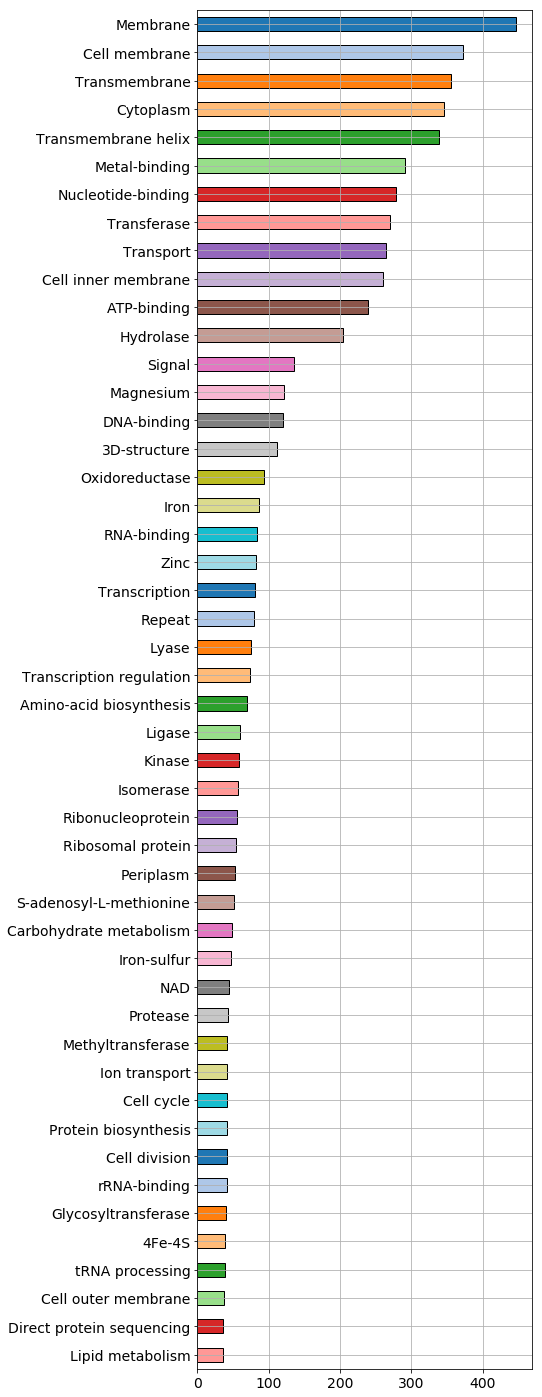

In [40]:
# obter um conjunto de cores contrastante
from matplotlib import cm
colors = cm.get_cmap('tab20', 20).colors

# rejeitar as duas primeiras kwds, que são "universais", não informativas

ax = counts_kw[2:50].plot(kind='barh', figsize=(6,25), grid=True, fontsize=14,
                     color=colors, edgecolor='black')
ax.invert_yaxis()

#### 11.

Nos ficheiros do tipo _UniProt Text_ pode ser encontrada a informação sobre o _Enzyme Commission number_, um número que classifica enzimas de acordo com a reação catalisada. Se existir, esta informação está contida em certas linhas começadas por `DE`. Uma proteína pode ter vários números EC atribuídos.

Cada _EC number_ é constituído por 4 números (separados por '.') correspondentes a 4 níveis de classificação, tendo o **primeiro número**, a **classe** enzimática, o seguinte significado:

```
1- Oxidoreductases
2- Transferases
3- Hydrolases
4- Lyases
5 -Isomerases
6 -Ligases
7 -Translocases
```

Dado o ficheiro `uniprot_proteome_h_influenzae.txt` com as sequências do proteoma do organismo _H. influenzae_ em formato UniProt Text, (o mesmo formato do ficheiro usado nas TPs)

11.1 Qual a percentagem das proteínas que são enzimas? (A resposta deve ser apresentada com um `print()`

11.2 Faça programaticamente uma tabela com contagens das proteínas por cada uma das 7 classes enzimáticas e calcule a **percentagem** dos oxidoredutases e transferases juntos em relação ao total de enzimas.

11.3 Elabore um gráfico de barras com contagens das proteínas por cada uma das 7 classes enzimáticas


In [41]:
def extract_EC_from_Uniprot_txt(filename):
    with open(filename) as datafile:
        records = datafile.read().split('//\n')
    records.pop(-1) # há um // no fim do ficheiro
    
    prots = []
    for prot in records:
        idline, acline, *otherlines = prot.splitlines()
        ac = acline.split(';')[0].split()[1]
        
        # DE            EC=2.7.7.6 {ECO:0000255|HAMAP-Rule:MF_01321};
        
        ec = []
        for line in otherlines:
            if line.startswith('DE'):
                de, ecpart, *rest = line.split()
                if ecpart.startswith('EC='):
                    ec = ecpart.split('=')[1]
                    ec = ec.split('.')

        # acrescentar novo dicionário à lista prots
        prots.append({'AC': ac, 'EC': ec})
    return prots
        

prots = extract_EC_from_Uniprot_txt('uniprot_proteome_h_influenzae.txt')
print(f'Informação extraída para {len(prots)} proteínas')
prots[:10]

Informação extraída para 1707 proteínas


[{'AC': 'P44345', 'EC': []},
 {'AC': 'P43738', 'EC': ['2', '7', '7', '6']},
 {'AC': 'P31777', 'EC': ['2', '1', '1', '266']},
 {'AC': 'P44359', 'EC': []},
 {'AC': 'P44343', 'EC': []},
 {'AC': 'P44756', 'EC': ['5', '1', '3', '1;']},
 {'AC': 'P44346', 'EC': []},
 {'AC': 'P44347', 'EC': []},
 {'AC': 'P44083', 'EC': ['2', '1', '1', '189']},
 {'AC': 'P44906', 'EC': ['2', '1', '1', '185']}]

In [42]:
# 2.1

ntot = len(prots)

enzymes = [p for p in prots if len(p['EC']) > 0]
n_enzymes = len(enzymes)

percent_enzymes = 100 * n_enzymes / ntot

print(f'O número de proteínas que são enzimas é {n_enzymes} ({percent_enzymes:4.2f}% do total de proteínas)')

O número de proteínas que são enzimas é 742 (43.47% do total de proteínas)


In [43]:
# 2.2

class_def = {'1': 'Oxidoreductases', '2': 'Transferases', '3': 'Hydrolases', 
             '4': 'Lyases', '5': 'Isomerases', '6': 'Ligases', '7': 'Translocases'}

# obter uma lista com todos os códigos da classes (primeiros números)
classes = [p['EC'][0] for p in enzymes]

# contagens das classes

class_counts = {}

for c in class_def:
    class_counts[class_def[c]] = classes.count(c)

# ou
# class_counts = {class_def[c]: classes.count(c) for c in class_def}
class_counts

{'Oxidoreductases': 88,
 'Transferases': 259,
 'Hydrolases': 191,
 'Lyases': 67,
 'Isomerases': 55,
 'Ligases': 60,
 'Translocases': 22}

In [44]:
# 2.2 (mais apresentável)

import pandas as pd
table = pd.Series(class_counts)

table

Oxidoreductases     88
Transferases       259
Hydrolases         191
Lyases              67
Isomerases          55
Ligases             60
Translocases        22
dtype: int64

In [45]:
n_oxi_trans = table['Oxidoreductases'] + table['Transferases']

percent_oxi_trans = 100 * n_oxi_trans / n_enzymes
print(f'O número de Oxidoredutases e Transferases é {percent_oxi_trans:.2f}% do total de enzimas')

O número de Oxidoredutases e Transferases é 46.77% do total de enzimas


In [46]:
# 2.3
%matplotlib inline

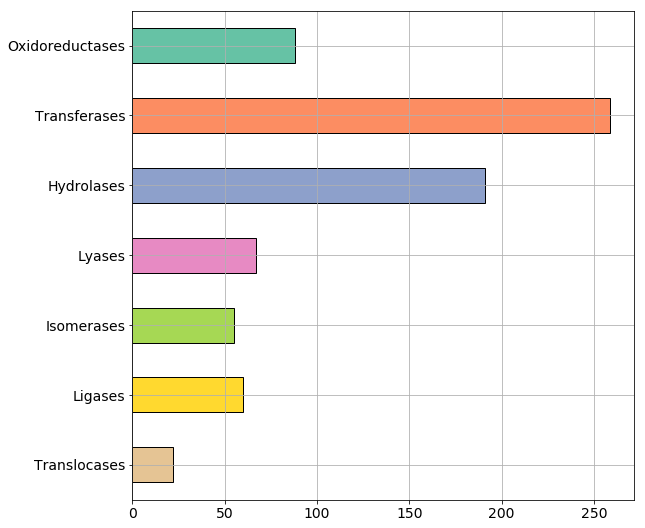

In [47]:
# obter um conjunto de cores contrastante
from matplotlib import cm
colors = cm.get_cmap('Set2', 9).colors

ax = table.plot(kind='barh', figsize=(9,9), grid=True, fontsize=14,
                     color=colors, edgecolor='black')
ax.invert_yaxis()

### Outra maneira, usando value_counts() das Series do Pandas

partindo do cálculo de `classes`...

In [48]:
# transformar classes numa Series do Pandas
# import pandas as pd
all_classes = pd.Series(classes)

# contagens
table_counts = all_classes.value_counts().sort_index()
# novos nomes, usando o dicionário class_def
table_counts = table_counts.rename(index=class_def)
table_counts

Oxidoreductases     88
Transferases       259
Hydrolases         191
Lyases              67
Isomerases          55
Ligases             60
Translocases        22
dtype: int64

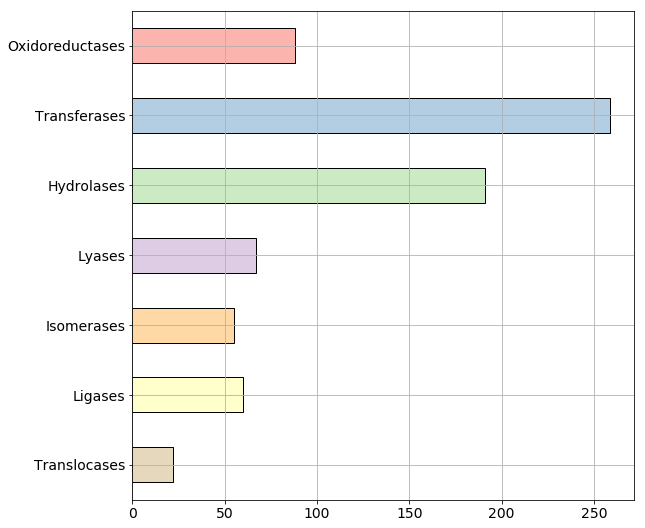

In [49]:
# obter um conjunto de cores customizado e contrastante
# from matplotlib import cm
colors = cm.get_cmap('Pastel1', 9).colors

ax = table.plot(kind='barh', figsize=(9,9), grid=True, fontsize=14,
                     color=colors, edgecolor='black')
ax.invert_yaxis()

Para os interessados nos colormaps disponíveis

[https://matplotlib.org/examples/color/colormaps_reference.html](https://matplotlib.org/examples/color/colormaps_reference.html)